# EDA of diabetes_012_health_indicators_BRFSS2015

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv("../data/raw/diabetes_012_health_indicators_BRFSS2015.csv")

## First glance at raw data

In [3]:
display(df_raw.shape)

(253680, 22)

In [4]:
display(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

None

#### Observation
* There are no missing values.
* All columns contain numbers, although some should be interpreted as categories.

In [5]:
step = 8

for i in range(0, len(df_raw.columns), step):
    display(df_raw[df_raw.columns[i : i + step]].head())

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0


,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth
0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0
1,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0
3,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0


,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,7.0,6.0,1.0
2,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
display(df_raw[df_raw.select_dtypes(include="number").columns].describe())

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


#### Observation
* `BMI` has a high maximum. Possibly an outlier.
* `MentHlth` and `PhysHlth` are negatively skewed. Both have more than 50% zeroes.

## Converted to intended datatype

### Data Dictionary – Diabetes Health Indicators

| Column                | Datatype   | Description                                                                 |
|-----------------------|------------|-----------------------------------------------------------------------------|
| `Diabetes_012`        | nominal    | 0 = no diabetes, 1 = prediabetes, 2 = diabetes                              |
| `HighBP`              | nominal    | 0 = no high blood pressure, 1 = high blood pressure                         |
| `HighChol`            | nominal    | 0 = no high cholesterol, 1 = high cholesterol                               |
| `CholCheck`           | nominal    | 0 = no cholesterol check in 5 years, 1 = yes                                |
| `BMI`                 | float      | Body Mass Index                                                             |
| `Smoker`              | nominal    | Smoked ≥100 cigarettes in lifetime: 0 = no, 1 = yes                         |
| `Stroke`              | nominal    | Ever told had a stroke: 0 = no, 1 = yes                                     |
| `HeartDiseaseorAttack`| nominal    | CHD or MI history: 0 = no, 1 = yes                                          |
| `PhysActivity`        | nominal    | Physical activity (last 30 days, non-job): 0 = no, 1 = yes                  |
| `Fruits`              | nominal    | Consumes fruit ≥1×/day: 0 = no, 1 = yes                                     |
| `Veggies`             | nominal    | Consumes vegetables ≥1×/day: 0 = no, 1 = yes                                |
| `HvyAlcoholConsump`   | nominal    | Heavy drinker: 0 = no, 1 = yes                                              |
| `AnyHealthcare`       | nominal    | Has health coverage: 0 = no, 1 = yes                                        |
| `NoDocbcCost`         | nominal    | Missed doctor due to cost (last 12 months): 0 = no, 1 = yes                 |
| `GenHlth`             | ordinal    | General health: 1 = excellent, ..., 5 = poor                                |
| `MentHlth`            | int        | Days of poor mental health (last 30 days), 0–30                             |
| `PhysHlth`            | int        | Days of poor physical health (last 30 days), 0–30                           |
| `DiffWalk`            | nominal    | Serious difficulty walking/stairs: 0 = no, 1 = yes                          |
| `Sex`                 | nominal    | 0 = female, 1 = male                                                        |
| `Age`                 | ordinal    | Age category: 1 = 18–24, ..., 13 = 80+                                      |
| `Education`           | ordinal    | Education level: 1 = none to kindergarten, ..., 6 = college grad           |
| `Income`              | ordinal    | Income level: 1 = < $10k, ..., 8 = ≥ $75k                                   |



### Conversion

In [7]:
cat_cols = [
    "Diabetes_012",
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "GenHlth",
    "DiffWalk",
    "Sex",
    "Age",
    "Education",
    "Income",
]

df_raw[cat_cols] = df_raw[cat_cols].astype("int").astype("category")

### Info, Describe, Overview

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_012          253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   HeartDiseaseorAttack  253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

In [9]:
display(df_raw.loc[:, df_raw.select_dtypes(include="number").columns].describe())

,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


In [10]:
def overview(df):
    """
    Creates and prints an overview of the DataFrame including data types, counts, missing values,
    unique values, and some basic statistics.
    """
    from pandas.api.types import is_numeric_dtype, is_categorical_dtype

    def normalized_entropy_cat(series: pd.Series) -> float:
        """
        Compute the normalized Shannon entropy of a categorical distribution.

        Returns 0 if only one class is present, 1 for perfectly uniform distribution.
        """
        counts = series.value_counts(normalize=True)
        entropy = -np.sum(counts * np.log2(counts))
        max_entropy = np.log2(len(counts)) if len(counts) > 1 else 1
        return entropy / max_entropy

    display(
        pd.DataFrame(
            {
                "dtype": df.dtypes,
                "total": df.count(),
                "missing": df.isna().sum(),
                "missing%": df.isna().mean() * 100,
                "n_uniques": df.nunique(),
                "uniques%": df.nunique() / df.shape[0] * 100,
                "uniques": [sorted(df[col].unique()) for col in df.columns],
                "non-numeric": [
                    list(
                        df[col][pd.to_numeric(df[col], errors="coerce").isna()].unique()
                    )
                    for col in df.columns
                ],
                "dev from mean": [
                    (
                        (
                            round(
                                ((df[col].mean() - df[col].min()) / df[col].std()), 1
                            ),
                            round(
                                ((df[col].max() - df[col].mean()) / df[col].std()), 1
                            ),
                        )
                        if is_numeric_dtype(df[col])
                        else pd.NA
                    )
                    for col in df.columns
                ],
                "most/least freq": [
                    (
                        (
                            {
                                df[col].value_counts().index[i]: list(
                                    df[col].value_counts()
                                )[i] for i in (0, -1)
                            }
                           
                        )
                        if not is_numeric_dtype(df[col])
                        else pd.NA
                    )
                    for col in df.columns
                ],
                "norm entropy": [
                    round(normalized_entropy_cat(df[col]), 2)
                    if isinstance(df[col].dtype, pd.CategoricalDtype)
                    else pd.NA
                    for col in df.columns
                ],
            }
        )
    )


overview(df_raw)

,dtype,total,missing,missing%,n_uniques,uniques%,uniques,non-numeric,dev from mean,most/least freq,norm entropy
Diabetes_012,category,253680,0,0.0,3,0.001183,"[0, 1, 2]",[],<NA>,"{0: 213703, 1: 4631}",0.45
HighBP,category,253680,0,0.0,2,0.000788,"[0, 1]",[],<NA>,"{0: 144851, 1: 108829}",0.99
HighChol,category,253680,0,0.0,2,0.000788,"[0, 1]",[],<NA>,"{0: 146089, 1: 107591}",0.98
CholCheck,category,253680,0,0.0,2,0.000788,"[0, 1]",[],<NA>,"{1: 244210, 0: 9470}",0.23
BMI,float64,253680,0,0.0,84,0.033113,"[12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19....",[],"(2.5, 10.5)",<NA>,<NA>
Smoker,category,253680,0,0.0,2,0.000788,"[0, 1]",[],<NA>,"{0: 141257, 1: 112423}",0.99
Stroke,category,253680,0,0.0,2,0.000788,"[0, 1]",[],<NA>,"{0: 243388, 1: 10292}",0.24
HeartDiseaseorAttack,category,253680,0,0.0,2,0.000788,"[0, 1]",[],<NA>,"{0: 229787, 1: 23893}",0.45
PhysActivity,category,253680,0,0.0,2,0.000788,"[0, 1]",[],<NA>,"{1: 191920, 0: 61760}",0.8
Fruits,category,253680,0,0.0,2,0.000788,"[0, 1]",[],<NA>,"{1: 160898, 0: 92782}",0.95


#### Observation
* `Age`, `Education`, `Income`, `Diabetes_012` are categories with more than two values. All other categories are logical.
* The target `Diabetes_012` is heavily imbalanced.
* `BMI` contains values further than 10 standard deviations from the mean. Check for outliers.
* `HighBP`, `HighChol`, `Smoker`, `PhysActivity`, `Fruits`, `Veggies`, `GenHlth`, `DiffWalk`, `Sex`, `Age`, `Education`, `Income` are no more than slightly unbalanced, all other categories are highly unbalanced.

### Crosstabs

#### Observation
* Most logical categories show a difference of more than 5 percentage points of healthy people between the two categories.
* Nominal categories suggest a correlation between increasing values and state of health.

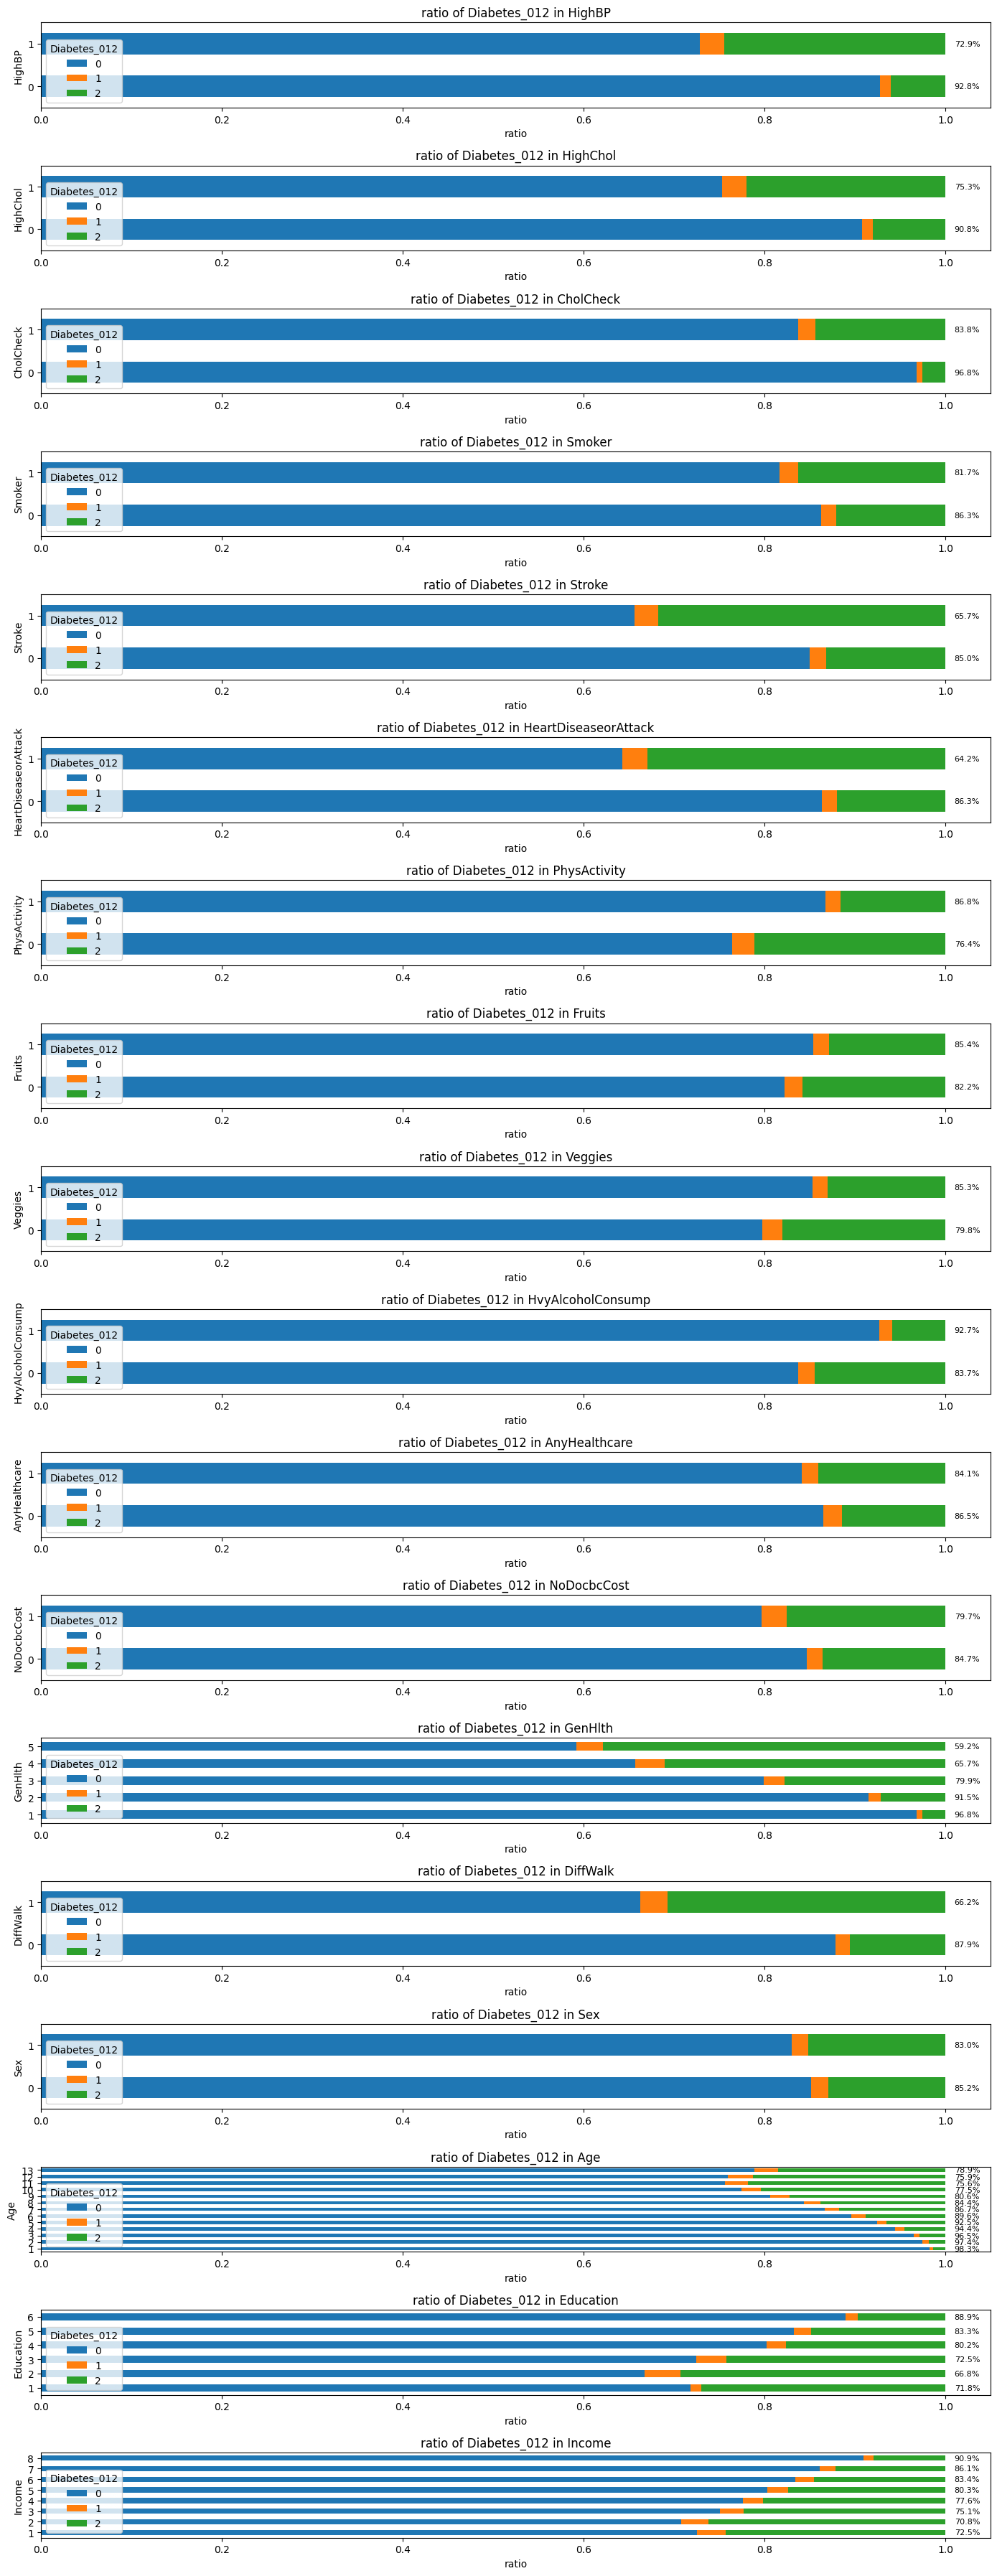

CPU times: total: 3.25 s
Wall time: 3.25 s


In [11]:
%%time

categorical_features = df_raw.select_dtypes(include=["object", "category"]).columns.tolist()

df_raw_copy = df_raw[categorical_features].copy()

categorical_features = [col for col in categorical_features if col != "Diabetes_012"]
# categorical_features= ["HighBP"]
feature_ct = len(categorical_features)

fig, axs = plt.subplots(feature_ct, 1, figsize=(14, 2 * feature_ct))
if feature_ct == 1:
    axs = [axs]  # ensure axs is always iterable

for ax, feature in zip(axs, categorical_features):

    ct = pd.crosstab(index=df_raw_copy[feature], columns=df_raw_copy["Diabetes_012"])

    ct_ratio = ct.div(ct.sum(axis=1), axis=0).fillna(0)

    ct_ratio.plot(kind="barh", stacked=True, ax=ax, legend=False)

    for i, (index, row) in enumerate(ct_ratio.iterrows()):
        ratio = row.get(0, 0)
        ax.text(1.01, i, f"{ratio:.1%}", va="center", fontsize=8)

    ax.set_xlabel("ratio")
    ax.set_ylabel(feature)
    ax.set_title(f"ratio of Diabetes_012 in {feature}")
    ax.legend(title="Diabetes_012", loc="lower left")

fig.tight_layout()
plt.show()

# df is not needed anymore
del df_raw_copy

### Pairplots

#### Observation
* No relevant differences are visible between the pairplots
* `MenHlth` and `PhysHlth` have more entries on counts divisible by 5. Possibly just the human need for beauty.

#### All columns

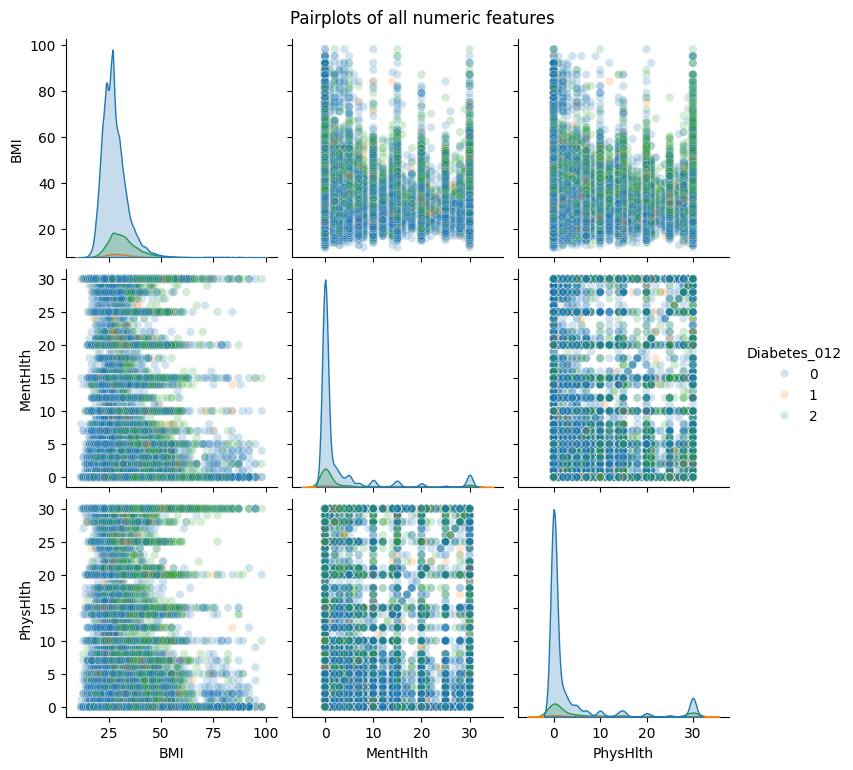

CPU times: total: 2min 29s
Wall time: 2min 30s


In [12]:
%%time
sns.pairplot(data=df_raw, plot_kws={'alpha': 0.2}, hue='Diabetes_012')
plt.suptitle("Pairplots of all numeric features", y=1.02)
plt.show();

#### Pairplots Women

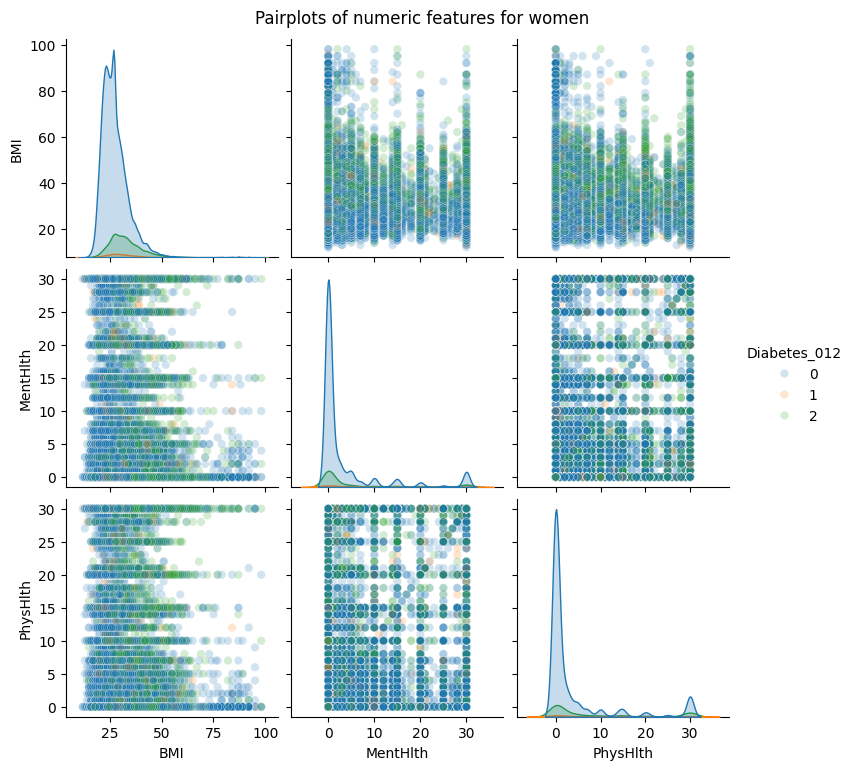

CPU times: total: 1min 23s
Wall time: 1min 23s


In [13]:
%%time
sns.pairplot(data=df_raw[df_raw["Sex"] == 0], plot_kws={'alpha': 0.2}, hue='Diabetes_012')
plt.suptitle("Pairplots of numeric features for women", y=1.02)
plt.show();

#### Pairplots Men

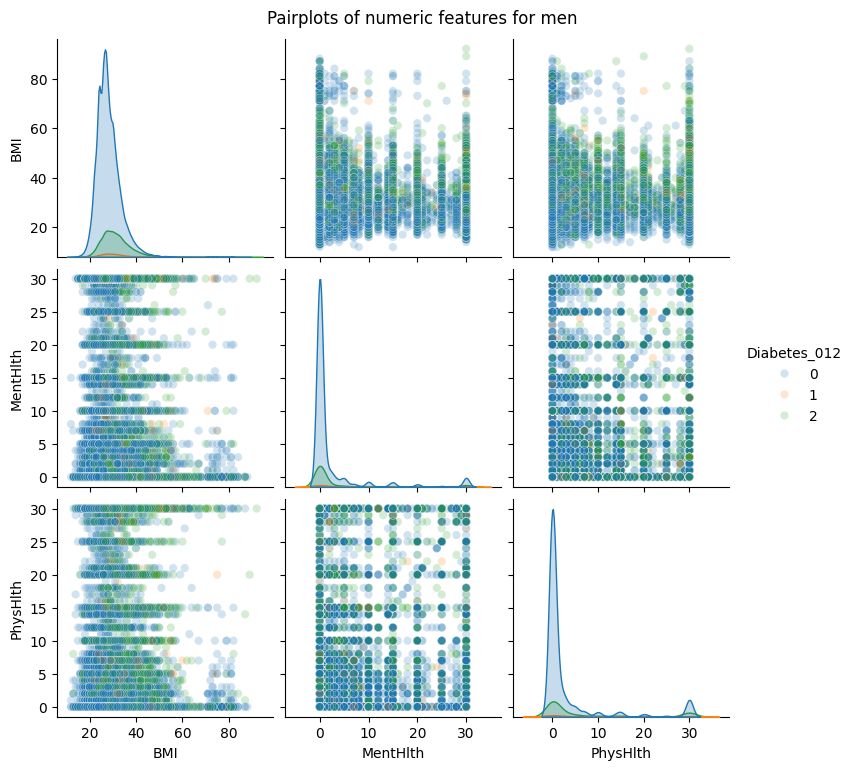

CPU times: total: 1min 2s
Wall time: 1min 2s


In [14]:
%%time
sns.pairplot(data=df_raw[df_raw["Sex"] == 1], plot_kws={'alpha': 0.2}, hue='Diabetes_012', )
plt.suptitle("Pairplots of numeric features for men", y=1.02)
plt.show();

## Correlations

#### Observations
* There are notable correlations between 
  * `GenHlth`, `PhysHlth` and `DiffWalk`. These seem reasonable.
  * `Education` and `Income`. Also reasonable.
* There are lower, but still notable correlations between
  * `Diabetes_012`, `GenHlth`
  * `GenHlth`, `Diabetes_012`, `HighBP`, `Income`
  * `MenHlth`, `GenHlth`
  * `MenHlth`, `PhysHlth`
  * `Income`, `GenHlth`, `DiffWalk`, last one somewhat surprising

#### Conclusion
Relevant correlations are present. Appropriate feature selection must be conducted.

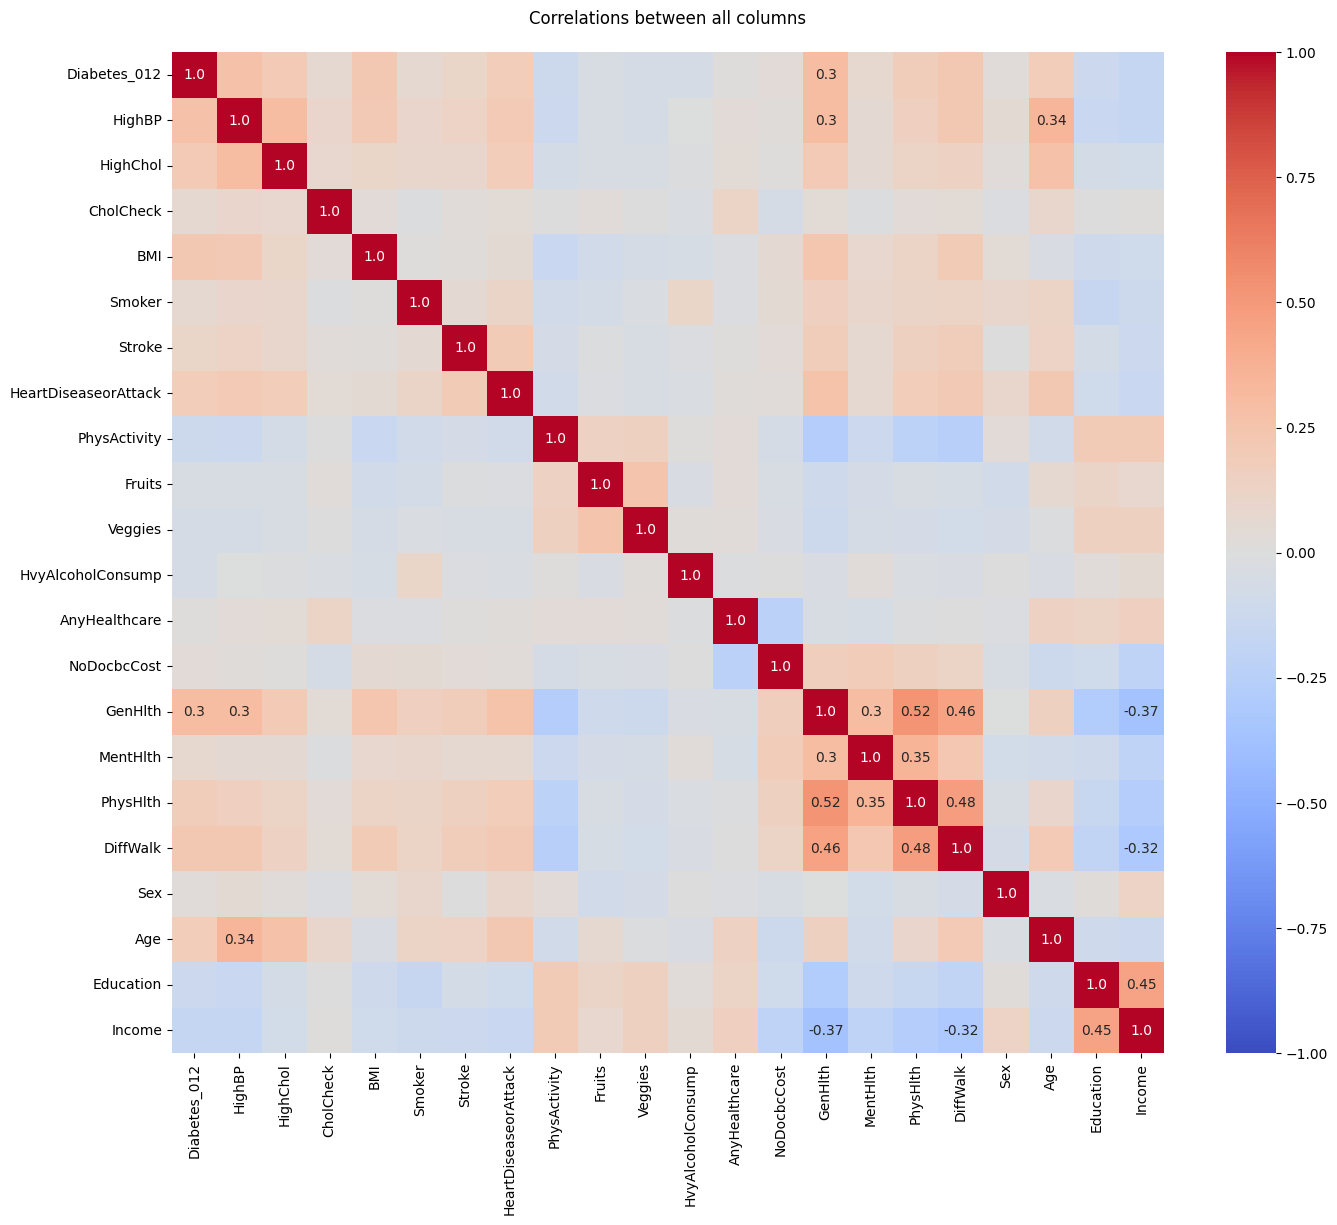

In [15]:
corr = df_raw.corr()
mask = np.abs(corr) < 0.3
annot = corr.round(2).astype(str)
annot[mask] = ""

plt.figure(figsize=(16, 13))
sns.heatmap(
    corr,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
)

plt.title("Correlations between all columns", y=1.02)
plt.show();

## Outlier Detection

#### Observations
* Up to about 70 `BMI` has a clean distribution. From then on spikes appear with no visible reason. The distribution of diabetes looks similar to the whole distribution.
* `MentHlth` and `PhysHlth` have most of their values at 0. The distribution of diabetes looks similar to the whole distribution.

#### Conclusion
* Check the validity of the very high BMI-values.
* No outliers found.

In [ ]:
from statsmodels.robust import mad

def mark_outliers_mad(df, std=3, show_cum=False, show_interesting_rows=False, interesting_rows=None, return_masks=False):
    """ Mark datapoints with 'std'-deviation from median as outliers.
    """
    def get_mad_outliers_mask(df, cn, std=3):
        x = df.loc[df[cn].notna(), cn]
        outliers = (abs(x - x.median()) / mad(x)) >= std

        # Rückgabe als vollständige Maske für gesamten df
        mask = pd.Series(outliers, index=df.index)
        mask.loc[x.index] = outliers
        mask.fillna(False, inplace=True)
        return mask
    
    outlier_masks = {}
    cols = df.select_dtypes(include="number").columns.tolist()

    col_settings = {cn: {} for cn in cols}

    show_interesting_rows = show_interesting_rows and (interesting_rows is not None)
    
    ncols =  1 + sum([show_cum, show_interesting_rows])
    fig, ax = plt.subplots(ncols=ncols, nrows=len(cols), figsize=(12, len(cols)*2 + 2))

    # Immer 2D-Array erzwingen: [nrows, ncols]
    if len(cols) == 1 and ncols == 1:
        ax = np.array([[ax]])
    elif len(cols) == 1:
        ax = np.atleast_2d(ax)
    elif ncols == 1:
        ax = np.atleast_2d(ax).T
        
    for idx, col in enumerate(cols):
        sett = col_settings[col]
        axe = ax[idx, 0]
        outlier_mask = get_mad_outliers_mask(df, col, 3)

        if return_masks:
            outlier_masks[col] = outlier_mask

        df_temp = pd.concat(
            [df, pd.DataFrame({f"mad_{std}_outlier": outlier_mask})], axis=1)

        sns.histplot(data=df_temp, x=col, ax=axe, hue=f"mad_{std}_outlier")
        axe.set_yscale('log')
        axe.set_title(f"histplot of {col}")
        
        
        if show_interesting_rows:
            prev_axe = axe
            axe = ax[idx, 1]
            axe.set_xlim(prev_axe.get_xlim())
            axe.set_ylim(prev_axe.get_ylim())
            
            df_temp = pd.concat(
                [df[[col]].copy(), pd.DataFrame({f"inter_mad_{std}_outlier": outlier_mask})], axis=1)
            # Die nicht interessanten Zeilen rausnehmen
            df_temp.loc[~interesting_rows, col] = np.nan
            
            sns.histplot(data=df_temp, x=col, ax=axe, hue=f"inter_mad_{std}_outlier")
            axe.set_yscale('log')
            axe.set_title(f"Histplot of cases with diabetes in {col}")

        if show_cum:
            outlier_threshold_max = df[~outlier_mask].loc[:, col].max()
            # axe.axvline(outlier_threshold_max, c='g')

            axe = ax[idx, 1 + show_interesting_rows]
            sns.ecdfplot(df[col].dropna(), ax=axe)

            grenze = sett.get("threshold", outlier_threshold_max)

            axe.axvline(x=grenze, color="red", linestyle="--")
            cdf_value = (df[col].dropna() <= grenze).mean()
            print()

            axe.set_title(
                f"Cumsum {col} with threshold {outlier_threshold_max}"
                f"\nratio below {grenze}: {cdf_value:.3f}"
            )

    plt.tight_layout()
    plt.show()
    if return_masks:
        # conditional return, prevents printing of the masks, if the call is the last line in the cell
        return outlier_masks

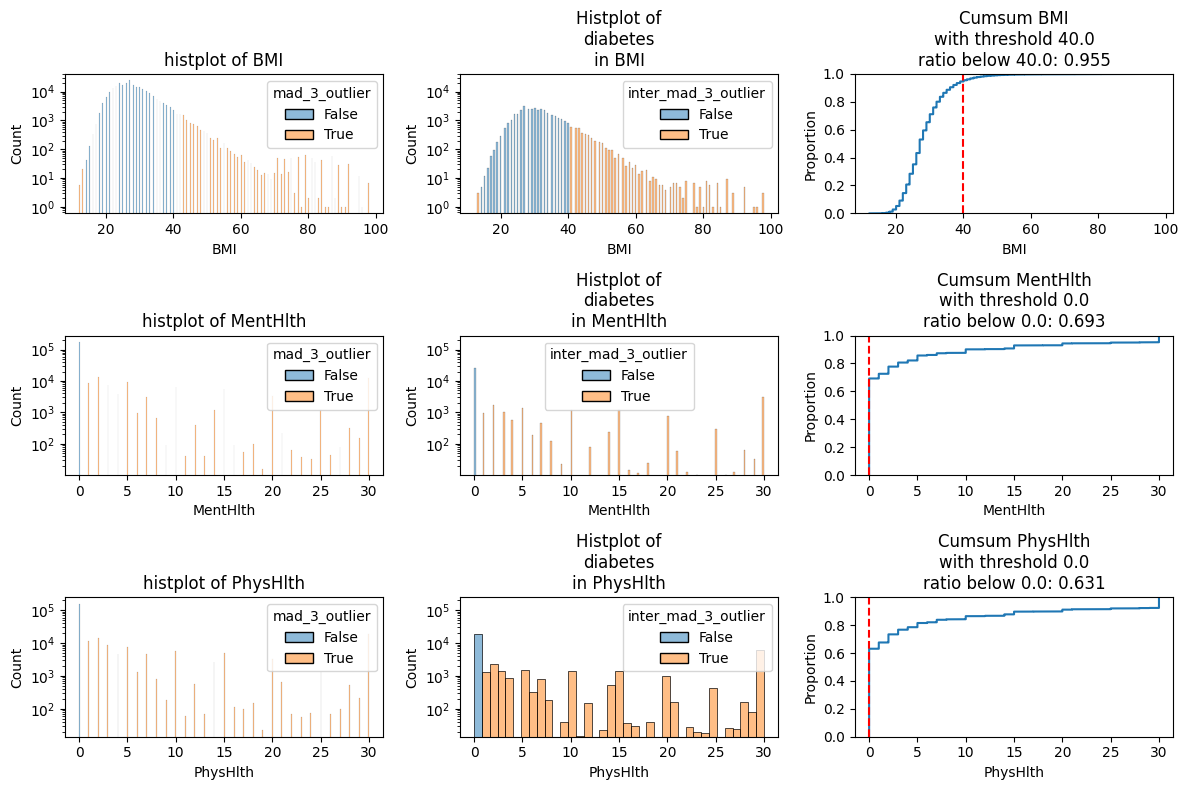

In [18]:
mark_outliers_mad(df_raw, show_interesting_rows=True, interesting_rows=df_raw['Diabetes_012']!=0, show_cum=True)